In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from keras.layers import Dense, Layer,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [2]:
data=pd.read_csv("/content/train_LZdllcl (1).csv")

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
data.shape

(54808, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
data['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [9]:
data.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [10]:
data['education']

,education
0,Master's & above
1,Bachelor's
2,Bachelor's
3,Bachelor's
4,Bachelor's
...,...
54803,Bachelor's
54804,Master's & above
54805,Bachelor's
54806,NaN


In [11]:
data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [12]:
data['education'].mode()

,education
0,Bachelor's


In [13]:
data['education'] = data['education'].fillna(data['education'].mode()[0])

In [14]:
data.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [15]:
data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [16]:
data['previous_year_rating'].mode()

,previous_year_rating
0,3.0


In [17]:
data['previous_year_rating']=data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0])

In [18]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [20]:
data['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [21]:
cols=['department','region','education','gender','recruitment_channel']
label=LabelEncoder()

In [22]:
for i in cols:
  data[i]=label.fit_transform(data[i])

In [23]:
data=data.drop('employee_id',axis=1)

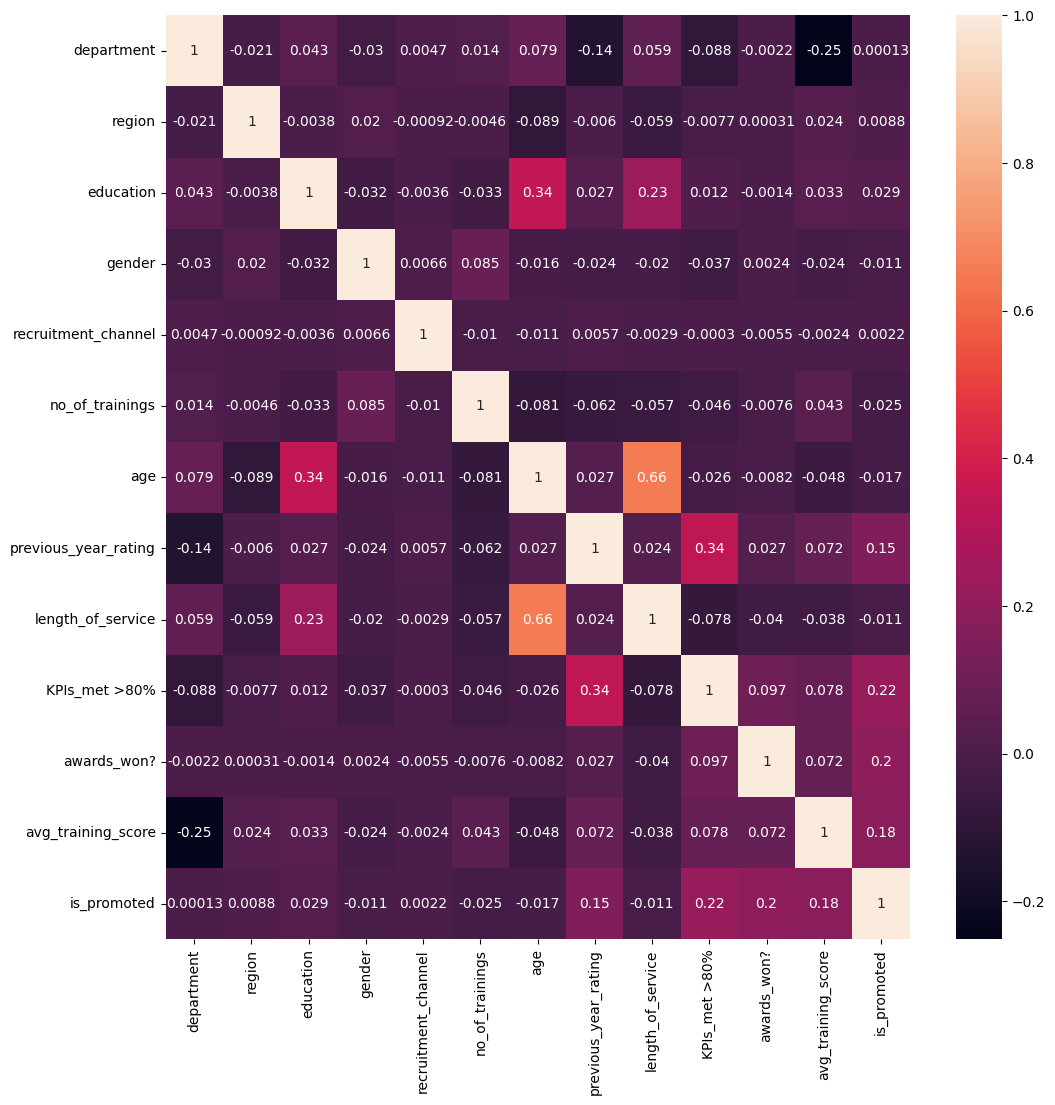

In [24]:
plt.figure(figsize=(12,12))
corr=data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [25]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [26]:
columns=['gender','no_of_trainings', 'age','length_of_service']

In [27]:
for i in columns:
  data=data.drop(i,axis=1)

In [28]:
data

,department,region,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,2,5.0,1,0,49,0
1,4,14,0,0,5.0,0,0,60,0
2,7,10,0,2,3.0,0,0,50,0
3,7,15,0,0,1.0,0,0,50,0
4,8,18,0,0,3.0,0,0,73,0
...,...,...,...,...,...,...,...,...,...
54803,8,5,0,2,3.0,0,0,78,0
54804,4,19,2,0,2.0,0,0,56,0
54805,0,0,0,0,5.0,1,0,79,0
54806,7,33,0,2,1.0,0,0,45,0


In [29]:
data.isna().sum()

,0
department,0
region,0
education,0
recruitment_channel,0
previous_year_rating,0
KPIs_met >80%,0
awards_won?,0
avg_training_score,0
is_promoted,0


In [30]:
data[(data['is_promoted']==1) & (data['avg_training_score'] <50)]

,department,region,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
60,7,28,2,0,4.0,1,0,47,1
75,7,11,2,2,4.0,1,0,49,1
188,7,8,0,0,4.0,1,0,48,1
391,7,0,2,0,3.0,1,0,49,1
443,7,31,0,2,5.0,1,0,46,1
...,...,...,...,...,...,...,...,...,...
54107,7,15,2,0,3.0,1,0,47,1
54113,7,11,2,0,3.0,1,0,49,1
54180,7,23,2,0,4.0,1,0,47,1
54269,7,7,0,0,4.0,1,0,49,1


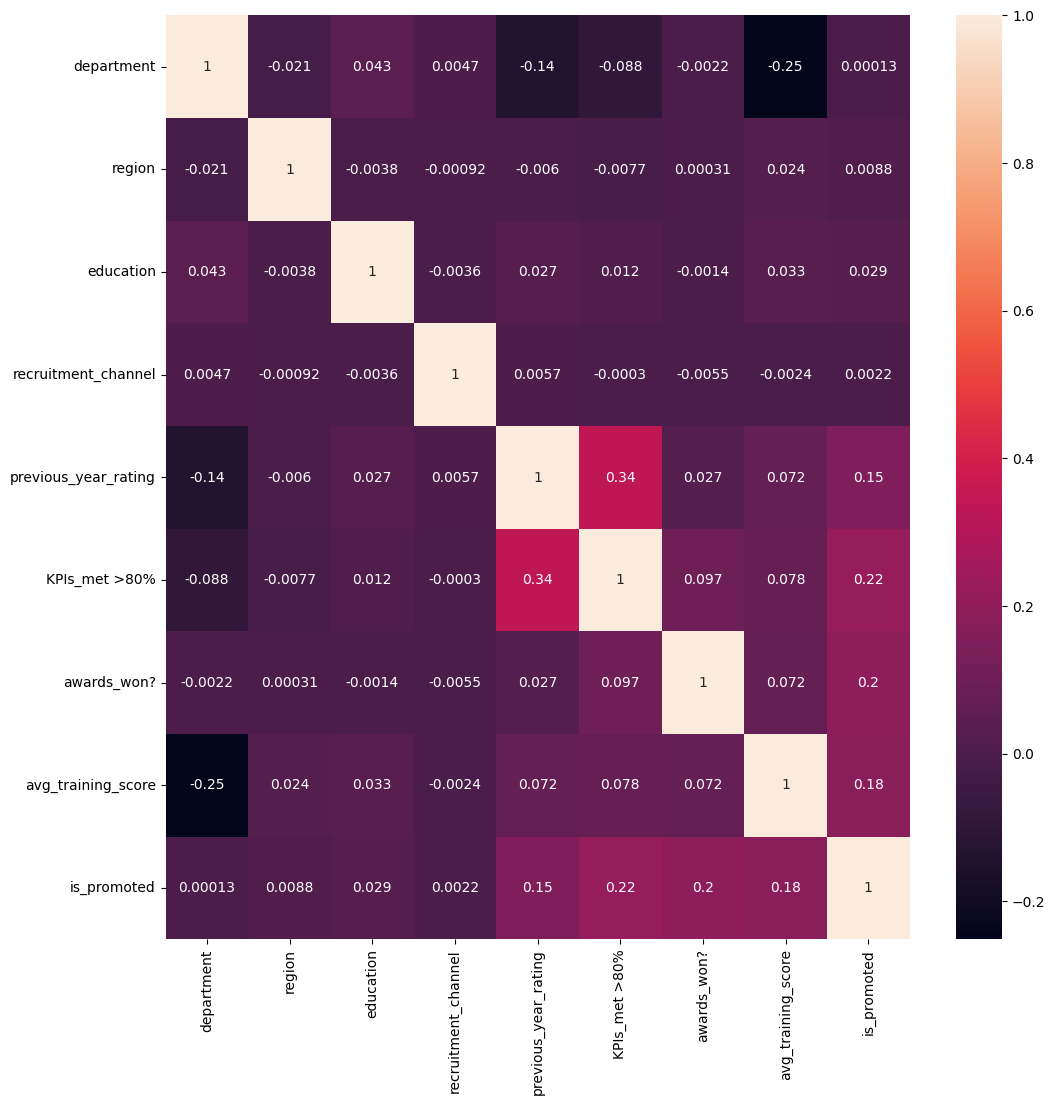

In [31]:
plt.figure(figsize=(12,12))
corr=data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [32]:
weights=[2.0,2.0]

In [33]:
colss=['avg_training_score','KPIs_met >80%']

In [34]:
scaler=StandardScaler()
data_norm=pd.DataFrame(scaler.fit_transform(data.iloc[:,:]), columns=data.columns)

In [35]:
data_norm

,department,region,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.808933,1.776526,1.619758,1.154111,1.395766,1.356878,-0.154018,-1.075931,-0.305122
1,-0.388183,-0.163034,-0.628838,-0.885239,1.395766,-0.736986,-0.154018,-0.253282,-0.305122
2,0.808933,-0.619401,-0.628838,1.154111,-0.250651,-0.736986,-0.154018,-1.001145,-0.305122
3,0.808933,-0.048942,-0.628838,-0.885239,-1.897069,-0.736986,-0.154018,-1.001145,-0.305122
4,1.207972,0.293333,-0.628838,-0.885239,-0.250651,-0.736986,-0.154018,0.718939,-0.305122
...,...,...,...,...,...,...,...,...,...
54803,1.207972,-1.189860,-0.628838,1.154111,-0.250651,-0.736986,-0.154018,1.092871,-0.305122
54804,-0.388183,0.407425,1.619758,-0.885239,-1.073860,-0.736986,-0.154018,-0.552428,-0.305122
54805,-1.984338,-1.760319,-0.628838,-0.885239,1.395766,1.356878,-0.154018,1.167657,-0.305122
54806,0.808933,2.004710,-0.628838,1.154111,-1.897069,-0.736986,-0.154018,-1.375077,-0.305122


In [36]:
for i,w in zip(colss, weights):
  data_norm[i] *= w

In [37]:
data_norm

,department,region,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.808933,1.776526,1.619758,1.154111,1.395766,2.713756,-0.154018,-2.151863,-0.305122
1,-0.388183,-0.163034,-0.628838,-0.885239,1.395766,-1.473972,-0.154018,-0.506565,-0.305122
2,0.808933,-0.619401,-0.628838,1.154111,-0.250651,-1.473972,-0.154018,-2.002290,-0.305122
3,0.808933,-0.048942,-0.628838,-0.885239,-1.897069,-1.473972,-0.154018,-2.002290,-0.305122
4,1.207972,0.293333,-0.628838,-0.885239,-0.250651,-1.473972,-0.154018,1.437878,-0.305122
...,...,...,...,...,...,...,...,...,...
54803,1.207972,-1.189860,-0.628838,1.154111,-0.250651,-1.473972,-0.154018,2.185741,-0.305122
54804,-0.388183,0.407425,1.619758,-0.885239,-1.073860,-1.473972,-0.154018,-1.104855,-0.305122
54805,-1.984338,-1.760319,-0.628838,-0.885239,1.395766,2.713756,-0.154018,2.335314,-0.305122
54806,0.808933,2.004710,-0.628838,1.154111,-1.897069,-1.473972,-0.154018,-2.750153,-0.305122


In [38]:
data

,department,region,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,2,5.0,1,0,49,0
1,4,14,0,0,5.0,0,0,60,0
2,7,10,0,2,3.0,0,0,50,0
3,7,15,0,0,1.0,0,0,50,0
4,8,18,0,0,3.0,0,0,73,0
...,...,...,...,...,...,...,...,...,...
54803,8,5,0,2,3.0,0,0,78,0
54804,4,19,2,0,2.0,0,0,56,0
54805,0,0,0,0,5.0,1,0,79,0
54806,7,33,0,2,1.0,0,0,45,0


In [39]:
x=data_norm.iloc[:,:-1]

In [40]:
y=data.iloc[:,-1]

In [41]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=13)


In [42]:
tree=DecisionTreeClassifier(max_depth=4)

In [43]:
reg1=LogisticRegression()
reg2=DecisionTreeClassifier(max_depth=4)
reg3=SVC()

In [44]:
voting_clas=VotingClassifier(estimators=[('LR',reg1),('DT',reg2),("SVC",reg3)], weights=[0.2,0.6,0.3])

In [45]:
voting_clas.fit(x_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier(max_depth=4)),
                             ('SVC', SVC())],
                 weights=[0.2, 0.6, 0.3])

In [46]:
y_pred=voting_clas.predict(x_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10004
           1       0.83      0.15      0.26       958

    accuracy                           0.92     10962
   macro avg       0.88      0.58      0.61     10962
weighted avg       0.92      0.92      0.90     10962



In [49]:
n_feature=x_train.shape[1]

In [50]:
model=Sequential()
model.add(Dense(16, activation='relu', input_shape=(n_feature,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(128,activation="relu"))
model.add(Dropout(rate=0.4))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,985 (406.19 KB)

 Trainable params: 103,985 (406.19 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [53]:
history=model.fit(x,
                  y,
                  validation_split=0.2,
                  epochs=15,
                  batch_size=16,
                  verbose=1)

Epoch 1/15
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9149 - loss: 0.2622 - val_accuracy: 0.9230 - val_loss: 0.2431
Epoch 2/15
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9262 - loss: 0.2297 - val_accuracy: 0.9242 - val_loss: 0.2311
Epoch 3/15
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9222 - loss: 0.2229 - val_accuracy: 0.9279 - val_loss: 0.2311
Epoch 4/15
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9302 - loss: 0.2177 - val_accuracy: 0.9283 - val_loss: 0.2319
Epoch 5/15
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9308 - loss: 0.2170 - val_accuracy: 0.9300 - val_loss: 0.2249
Epoch 6/15
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9313 - loss: 0.2119 - val_accuracy: 0.9310 - val_loss: 0.2125
Epoch 7/15
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9359 - loss: 0.2052 - val_accuracy: 0.9336 - val_loss: 0.2253
Epoch 8/15
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9336 - loss: 0.20

In [54]:
model.evaluate(x, y, batch_size=None, verbose=1)

1713/1713 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9358 - loss: 0.2008


[0.19934436678886414, 0.936341404914856]

## NEXT

In [57]:
ts_data=pd.read_csv("/content/test_2umaH9m (1).csv")

In [58]:
test_data=pd.read_csv("/content/test_2umaH9m (1).csv")

In [59]:
ts_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [60]:
cols=['department','region','education','gender','recruitment_channel']
label=LabelEncoder()
for i in cols:
  ts_data[i]=label.fit_transform(ts_data[i])

In [61]:
columns=['employee_id','gender','no_of_trainings', 'age','length_of_service']
for i in columns:
  ts_data=ts_data.drop(i,axis=1)

In [62]:
ts_data.isnull().sum()


,0
department,0
region,0
education,0
recruitment_channel,0
previous_year_rating,1812
KPIs_met >80%,0
awards_won?,0
avg_training_score,0


In [63]:
ts_data['education'] = ts_data['education'].fillna(data['education'].mode()[0])

In [64]:
ts_data['previous_year_rating']=ts_data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0])

In [65]:
ts_data.isnull().sum()

,0
department,0
region,0
education,0
recruitment_channel,0
previous_year_rating,0
KPIs_met >80%,0
awards_won?,0
avg_training_score,0


In [66]:
ts_data

,department,region,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,2,3.0,1,0,77
1,2,28,0,0,3.0,0,0,51
2,7,4,0,0,1.0,0,0,47
3,5,11,0,0,2.0,0,0,65
4,1,21,0,2,4.0,0,0,61
...,...,...,...,...,...,...,...,...
23485,3,11,1,2,3.0,0,0,61
23486,8,17,0,2,3.0,0,0,74
23487,2,7,0,2,4.0,0,0,50
23488,5,24,0,2,3.0,0,0,70


In [67]:
scaler=StandardScaler()
ts_data_norm=pd.DataFrame(scaler.fit_transform(ts_data.iloc[:,:]), columns=ts_data.columns)

In [68]:
for i,w in zip(colss, weights):
  ts_data_norm[i] *= w

In [69]:
ts_data_norm

,department,region,education,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,1.206058,0.290490,-0.692399,1.154134,-0.257191,2.673430,-0.152665,2.048526
1,-1.180154,1.436621,-0.692399,-0.883722,-0.257191,-1.496205,-0.152665,-1.828754
2,0.808356,-1.314094,-0.692399,-0.883722,-1.900667,-1.496205,-0.152665,-2.425258
3,0.012952,-0.511802,-0.692399,-0.883722,-1.078929,-1.496205,-0.152665,0.259012
4,-1.577856,0.634329,-0.692399,1.154134,0.564547,-1.496205,-0.152665,-0.337492
...,...,...,...,...,...,...,...,...
23485,-0.782452,-0.511802,0.294282,1.154134,-0.257191,-1.496205,-0.152665,-0.337492
23486,1.206058,0.175877,-0.692399,1.154134,-0.257191,-1.496205,-0.152665,1.601148
23487,-1.180154,-0.970255,-0.692399,1.154134,0.564547,-1.496205,-0.152665,-1.977880
23488,0.012952,0.978169,-0.692399,1.154134,-0.257191,-1.496205,-0.152665,1.004643


In [79]:
y_pred=model.predict(ts_data_norm)

735/735 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [80]:
y_pred_probs = model.predict(ts_data_norm)
y_pred_labels = (y_pred_probs > 0.5).astype(int)


735/735 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [81]:
y_pred_labels

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [82]:
result_df=pd.DataFrame({
    "employee_id": test_data['employee_id'],
    "is_promoted": y_pred_labels.flatten()
})

In [83]:
result_df.to_csv('employee_predictions4.csv', index=False)

## HyperParameter Turning

In [ ]:
model=Sequential()
model.add(Dense(16, activation='relu', input_shape=(n_feature,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(128,activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(x,
                  y,
                  validation_split=0.2,
                  epochs=15,
                  batch_size=8,
                  verbose=1)

In [ ]:
model.evaluate(x, y, batch_size=None, verbose=1)

In [ ]:
def train_model(learning_rate=0.013, batch_size=8, num_epochs=5,optimizer=Adam):
  model=Sequential()
  model.add(Dense(16, activation='relu', input_shape=(n_feature,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(128,activation="relu"))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(rate=0.3))
  model.add(Dense(1, activation="sigmoid"))

  optimizer=Adam(learning_rate=learning_rate)
  model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])
  histroy=model.fit(x_train,y_train,validation_split=0.2,
                    epochs=num_epochs,batch_size=batch_size,verbose=0)
  return histroy


In [ ]:
optimizer={
    "Adam": Adam(learning_rate=0.001),
    "SGD":SGD(learning_rate=0.001),
    "RMSprop":RMSprop(learning_rate=0.001)
}
hist={}

In [ ]:
for i in optimizer:
  hist[i]=train_model(optimizer=i)

In [ ]:
def plot(to_plot=x,name="learning_rate"):
  plt.figure(figsize=(10,6))

  plt.subplot(1,2,1)
  for i in to_plot:
    plt.plot(hist[i].history['val_accuracy'],label=f"{name}={i}")
  plt.title("Validation Accuracy per epochs")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend()

  plt.subplot(1,2,2)
  for i in to_plot:
    plt.plot(hist[i].history['val_accuracy'],label=f"{name}={i}")
  plt.title("validation Loss per Epoch")
  plt.xlabel("Epochs")
  plt.ylabel("loss")
  plt.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
plot(to_plot=optimizer,name="optimizer_name")